In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import tensorflow as tf

In [26]:
# to install package
import sys
!{sys.executable} -m brew install libomp

/Library/Frameworks/Python.framework/Versions/3.8/bin/python3: No module named brew


In [2]:
jobs_df = pd.read_csv("EDA_data_result.csv")
jobs_df

,Unnamed: 0,Job Title,Job Company,Job Location,Company Rating,Company Rating Numbers,Company Size,Company Founded,Company Type,Company Industry,Company Sector,Company Revenue,Level,Minimum,Maximum,Currency,Category,Company,Role
0,0,Senior Data Scientist - Ads Optimization,Indeed,"San Francisco, CA",4.3,703,10000+ Employees,2004,Company - Private,Internet,Information Technology,$2 to $5 billion (USD),Senior,153000.0,223000.0,USD,Data Science,NaN,Data Science
1,1,Technical Sourcer - Data Science & Analytics,Uber,"San Francisco, CA",4.0,3142,10000+ Employees,2009,Company - Public,Internet,Information Technology,$10+ billion (USD),Normal,87000.0,167000.0,USD,Data Science,NaN,Data Analyst
2,2,Senior Data Science Analyst,JM Talent Inc.,"Oakland, CA",0.0,0,Unknown,0,Company - Public,Unknown,Unknown,Unknown / Non-Applicable,Senior,100000.0,100000.0,USD,Data Science,NaN,Data Analyst
3,3,Data Science Lecturer,Excelon Associates,"Berkeley, CA",4.8,1,1 to 50 Employees,2007,Company - Private,Staffing & Outsourcing,Business Services,Less than $1 million (USD),Normal,62000.0,162000.0,USD,Data Science,NaN,Data Science
4,4,Data Scientist,Warman O'Brien,"San Francisco, CA",5.0,0,1 to 50 Employees,2017,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),Normal,120000.0,140000.0,USD,Data Science,NaN,Data Science
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5656,5656,Software Engineer - C#/.Net,Canalyst,Vancouver,3.3,8,51 to 200 Employees,0,Unknown,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,Normal,72000.0,100000.0,CA,Software Engineer,NaN,SWE
5657,5657,DevOps Engineer,Prenuvo,Vancouver,5.0,4,1 to 50 Employees,0,Company - Private,Health Care Services & Hospitals,Health Care,Unknown / Non-Applicable,Normal,81000.0,117000.0,CA,Software Engineer,NaN,Infra/System SWE
5658,5658,Software Engineer 1,WELL Health Technologies Corp,Vancouver,2.8,0,Unknown,0,Company - Private,Unknown,Unknown,Unknown / Non-Applicable,Normal,80000.0,119000.0,CA,Software Engineer,NaN,SWE
5659,5659,Software Engineer / Full Stack Developer,MPM Engineering,Surrey,0.0,0,Unknown,0,Company - Private,Unknown,Unknown,Unknown / Non-Applicable,Normal,53000.0,89000.0,CA,Software Engineer,NaN,Full Stack


In [30]:
# get dummy value from categorical data
df_model = jobs_df[["Job Location", "Company Rating", "Company Rating Numbers", "Company Size", "Company Founded", "Company Type", 
                    "Company Industry", "Company Sector", "Company Revenue", "Level", "Minimum", "Maximum", "Currency", "Role"]]
df_dum = pd.get_dummies(df_model)
df_dum

,Company Rating,Company Rating Numbers,Company Founded,Minimum,Maximum,"Job Location_Alameda, CA","Job Location_Berkeley, CA",Job Location_Brampton,"Job Location_Bronx, NY","Job Location_Brooklyn, NY",...,Role_Data Researcher,Role_Data SWE,Role_Data Science,Role_FrontEnd,Role_Full Stack,Role_General Data,Role_Infra/System SWE,Role_Machine Learning,Role_SWE,Role_Test
0,4.3,703,2004,153000.0,223000.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,4.0,3142,2009,87000.0,167000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0,0,100000.0,100000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.8,1,2007,62000.0,162000.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,5.0,0,2017,120000.0,140000.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5656,3.3,8,0,72000.0,100000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5657,5.0,4,0,81000.0,117000.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5658,2.8,0,0,80000.0,119000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5659,0.0,0,0,53000.0,89000.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [4]:
# split to training and test data
X = df_dum.drop(columns = ["Minimum", "Maximum"])
y = df_dum[["Minimum", "Maximum"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [5]:
import statsmodels.api as sm
# first model is multiple linear regression
def multiple_linear_regression(X_train, y_train):
    X_sm = X_train = sm.add_constant(X_train)
    model = sm.OLS(y_train, X_train)
    return model.fit()
sm_min_model = multiple_linear_regression(X_train, y_train['Minimum'])
sm_max_model = multiple_linear_regression(X_train, y_train['Maximum'])
sm_min_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Minimum   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     67.90
Date:                Wed, 24 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:02:36   Log-Likelihood:                -51850.
No. Observations:                4528   AIC:                         1.040e+05
Df Residuals:                    4375   BIC:                         1.050e+05
Df Model:                         152                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
const                                                      1.881e+04   3745.814      5.021      0.000    1.15e+04    2.62e+04
Company Rating                                             1852.4882    650.761      2.847      0.004     576.667    3128.309
Company Rating Numbers                                        0.3510      0.452      0.776      0.438      -0.536       1.238
Company Founded                                              -6.8569      1.265     -5.419      0.000      -9.337      -4.376
Job Location_Alameda, CA                                  -4052.2530   1.66e+04     -0.244      0.807   -3.66e+04    2.85e+04
Job Location_Berkeley, CA                                 -4.855e+04   7124.329     -6.814      0.000   -6.25e+04   -3.46e+04
Job Location_Brampton                                      1.045e+04   1.74e+04      0.602      0.547   -2.36e+04    4.45e+04
Job Location_Bronx, NY                                    -1.066e+04   7594.912     -1.403      0.161   -2.55e+04    4231.003
Job Location_Brooklyn, NY                                 -3.428e+04   5829.467     -5.881      0.000   -4.57e+04   -2.29e+04
Job Location_Burlingame, CA                                3.255e+04   6517.124      4.995      0.000    1.98e+04    4.53e+04
Job Location_Burnaby                                      -1.234e+04   5393.516     -2.289      0.022   -2.29e+04   -1770.128
Job Location_California                                   -9861.7836   5139.638     -1.919      0.055   -1.99e+04     214.509
Job Location_Canada                                       -2.881e+04   1.61e+04     -1.789      0.074   -6.04e+04    2763.879
Job Location_Delta                                        -1.249e+04   1.63e+04     -0.766      0.444   -4.45e+04    1.95e+04
Job Location_Edgewater, NJ                                -1.596e+04    2.4e+04     -0.665      0.506    -6.3e+04    3.11e+04
Job Location_Etobicoke                                     4742.6935   1.63e+04      0.291      0.771   -2.72e+04    3.67e+04
Job Location_Greenvale, NY                                -4.628e+04    2.4e+04     -1.929      0.054   -9.33e+04     744.568
Job Location_Jersey City, NJ                              -1.669e+04   1.39e+04     -1.201      0.230   -4.39e+04    1.06e+04
Job Location_Lake Success, NY                              3.213e+04   2.37e+04      1.355      0.175   -1.43e+04    7.86e+04
Job Location_Langley                                       1.712e+04   8093.656      2.115      0.034    1249.280     3.3e+04
Job Location_Long Island City, NY                          3.036e+04   1.49e+04      2.035      0.042    1104.656    5.96e+04
Job Location_Markham                                      -

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lm_min = LinearRegression()
lm_max = LinearRegression()
lm_min.fit(X_train, y_train['Minimum'])
lm_max.fit(X_train, y_train['Maximum'])

print("min_cross_val:", np.mean(cross_val_score(lm_min,X_train,y_train['Minimum'], scoring = 'neg_mean_absolute_error', cv= 3)))
print("max_cross_val:", np.mean(cross_val_score(lm_max,X_train,y_train['Maximum'], scoring = 'neg_mean_absolute_error', cv= 3)))

min_cross_val: -16748.748958012675
max_cross_val: -18552.570887599293


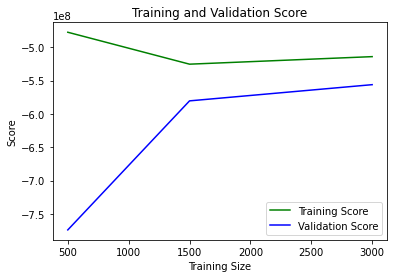

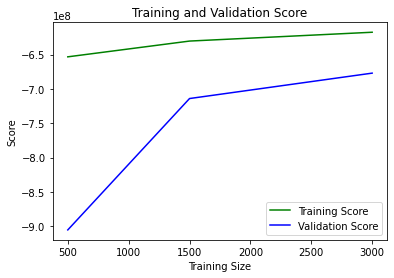

In [7]:
# Function to graph courses
from sklearn.model_selection import learning_curve

def plot_curve(estimator, X_train, y_train, train_sizes=[500, 1500, 3000], cv=5):
    train_sizes, train_scores, validation_scores = learning_curve(estimator, X_train, y_train, train_sizes = train_sizes,
                                                                  cv = cv, scoring = 'neg_mean_squared_error')
    train_scores_mean = train_scores.mean(axis=1)
    validation_scores_mean = validation_scores.mean(axis=1)
    
    plt.plot(train_sizes, train_scores_mean ,'g', label='Training Score')
    plt.plot(train_sizes, validation_scores_mean , 'b', label='Validation Score')
    plt.title('Training and Validation Score')
    plt.xlabel('Training Size')
    plt.ylabel('Score')
    plt.legend()
    plt.show()

plot_curve(lm_min, X_train, y_train['Minimum'])
plot_curve(lm_max, X_train, y_train['Maximum'])

In [8]:
lm_min_predict = lm_min.predict(X_test)
lm_max_predict = lm_max.predict(X_test)

print("MAE minimum:", mean_absolute_error(y_test['Minimum'], lm_min_predict))
print("MAE maximum:", mean_absolute_error(y_test['Maximum'], lm_max_predict))
print(lm_min_predict[15], lm_max_predict[15], y_test.iloc[[15]])

MAE minimum: 16015.415282936789
MAE maximum: 17568.945014277666
103547.9329865741 134147.17772900863        Minimum   Maximum
1227  100000.0  125000.0


In [9]:
# Deep learning model
dl_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_dim = X_train.shape[1], activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(y_train.shape[1], activation='linear')
])

dl_model.compile(optimizer='adam',
              loss='mean_absolute_error',
              metrics=['accuracy'])
dl_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               23680     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 514       
Total params: 57,218
Trainable params: 57,218
Non-trainable params: 0
_________________________________________________________________


In [12]:
# define checkpoint callback
checkpoint_name = './NN_weights' 
checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_name, monitor='val_loss', 
                                                verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]
history = dl_model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/500
114/114 [==============================] - 0s 1ms/step - loss: 32147.3301 - accuracy: 0.8962 - val_loss: 31652.7578 - val_accuracy: 0.9018

Epoch 00001: val_loss improved from inf to 31652.75781, saving model to ./NN_weights
INFO:tensorflow:Assets written to: ./NN_weights/assets
Epoch 2/500
114/114 [==============================] - 0s 1ms/step - loss: 31874.3965 - accuracy: 0.8962 - val_loss: 31292.7422 - val_accuracy: 0.9018

Epoch 00002: val_loss improved from 31652.75781 to 31292.74219, saving model to ./NN_weights
INFO:tensorflow:Assets written to: ./NN_weights/assets
Epoch 3/500
114/114 [==============================] - 0s 2ms/step - loss: 31599.5391 - accuracy: 0.8962 - val_loss: 30745.6113 - val_accuracy: 0.9018

Epoch 00003: val_loss improved from 31292.74219 to 30745.61133, saving model to ./NN_weights
INFO:tensorflow:Assets written to: ./NN_weights/assets
Epoch 4/500
114/114 [==============================] - 0s 2ms/step - loss: 31381.3789 - accuracy: 0.8962 - v

INFO:tensorflow:Assets written to: ./NN_weights/assets
Epoch 31/500
114/114 [==============================] - 0s 1ms/step - loss: 22824.7969 - accuracy: 0.8962 - val_loss: 22258.8867 - val_accuracy: 0.9018

Epoch 00031: val_loss improved from 22585.45703 to 22258.88672, saving model to ./NN_weights
INFO:tensorflow:Assets written to: ./NN_weights/assets
Epoch 32/500
114/114 [==============================] - 0s 1ms/step - loss: 23045.6602 - accuracy: 0.8962 - val_loss: 24534.5273 - val_accuracy: 0.9018

Epoch 00032: val_loss did not improve from 22258.88672
Epoch 33/500
114/114 [==============================] - 0s 1ms/step - loss: 22743.8105 - accuracy: 0.8962 - val_loss: 22224.6758 - val_accuracy: 0.9018

Epoch 00033: val_loss improved from 22258.88672 to 22224.67578, saving model to ./NN_weights
INFO:tensorflow:Assets written to: ./NN_weights/assets
Epoch 34/500
114/114 [==============================] - 0s 2ms/step - loss: 22885.4805 - accuracy: 0.8962 - val_loss: 22122.1523 - val_

114/114 [==============================] - 0s 1ms/step - loss: 20728.3418 - accuracy: 0.8962 - val_loss: 21491.1035 - val_accuracy: 0.8951

Epoch 00064: val_loss did not improve from 20732.64844
Epoch 65/500
114/114 [==============================] - 0s 2ms/step - loss: 20684.3867 - accuracy: 0.8959 - val_loss: 20763.3438 - val_accuracy: 0.9018

Epoch 00065: val_loss did not improve from 20732.64844
Epoch 66/500
114/114 [==============================] - 0s 1ms/step - loss: 20503.7422 - accuracy: 0.8962 - val_loss: 20421.4395 - val_accuracy: 0.9018

Epoch 00066: val_loss improved from 20732.64844 to 20421.43945, saving model to ./NN_weights
INFO:tensorflow:Assets written to: ./NN_weights/assets
Epoch 67/500
114/114 [==============================] - 0s 1ms/step - loss: 20589.7676 - accuracy: 0.8959 - val_loss: 21285.5977 - val_accuracy: 0.9018

Epoch 00067: val_loss did not improve from 20421.43945
Epoch 68/500
114/114 [==============================] - 0s 1ms/step - loss: 20722.2090 -


Epoch 00134: val_loss did not improve from 18613.49609
Epoch 135/500
114/114 [==============================] - 0s 2ms/step - loss: 18528.7422 - accuracy: 0.8959 - val_loss: 18926.4785 - val_accuracy: 0.9018

Epoch 00135: val_loss did not improve from 18613.49609
Epoch 136/500
114/114 [==============================] - 0s 1ms/step - loss: 18419.2910 - accuracy: 0.8962 - val_loss: 18618.6406 - val_accuracy: 0.9018

Epoch 00136: val_loss did not improve from 18613.49609
Epoch 137/500
114/114 [==============================] - 0s 1ms/step - loss: 18363.5098 - accuracy: 0.8962 - val_loss: 18681.1816 - val_accuracy: 0.9018

Epoch 00137: val_loss did not improve from 18613.49609
Epoch 138/500
114/114 [==============================] - 0s 1ms/step - loss: 18299.8008 - accuracy: 0.8962 - val_loss: 19521.0664 - val_accuracy: 0.9018

Epoch 00138: val_loss did not improve from 18613.49609
Epoch 139/500
114/114 [==============================] - 0s 1ms/step - loss: 18472.9238 - accuracy: 0.8962 -

Epoch 170/500
114/114 [==============================] - 0s 1ms/step - loss: 17367.1250 - accuracy: 0.8962 - val_loss: 18598.7480 - val_accuracy: 0.9018

Epoch 00170: val_loss did not improve from 17419.46094
Epoch 171/500
114/114 [==============================] - 0s 1ms/step - loss: 17501.3281 - accuracy: 0.8962 - val_loss: 17800.4531 - val_accuracy: 0.9018

Epoch 00171: val_loss did not improve from 17419.46094
Epoch 172/500
114/114 [==============================] - 0s 1ms/step - loss: 17239.6836 - accuracy: 0.8962 - val_loss: 17434.4961 - val_accuracy: 0.9018

Epoch 00172: val_loss did not improve from 17419.46094
Epoch 173/500
114/114 [==============================] - 0s 1ms/step - loss: 17263.0957 - accuracy: 0.8959 - val_loss: 17602.1602 - val_accuracy: 0.9018

Epoch 00173: val_loss did not improve from 17419.46094
Epoch 174/500
114/114 [==============================] - 0s 2ms/step - loss: 17701.7578 - accuracy: 0.8956 - val_loss: 17709.1582 - val_accuracy: 0.9018

Epoch 0017

INFO:tensorflow:Assets written to: ./NN_weights/assets
Epoch 207/500
114/114 [==============================] - 0s 1ms/step - loss: 16213.5811 - accuracy: 0.8959 - val_loss: 17459.5039 - val_accuracy: 0.9018

Epoch 00207: val_loss did not improve from 16531.73633
Epoch 208/500
114/114 [==============================] - 0s 1ms/step - loss: 16258.7715 - accuracy: 0.8962 - val_loss: 16911.0391 - val_accuracy: 0.9018

Epoch 00208: val_loss did not improve from 16531.73633
Epoch 209/500
114/114 [==============================] - 0s 1ms/step - loss: 16149.3115 - accuracy: 0.8962 - val_loss: 17520.1660 - val_accuracy: 0.8940

Epoch 00209: val_loss did not improve from 16531.73633
Epoch 210/500
114/114 [==============================] - 0s 2ms/step - loss: 16591.1289 - accuracy: 0.8951 - val_loss: 16530.9551 - val_accuracy: 0.9018

Epoch 00210: val_loss improved from 16531.73633 to 16530.95508, saving model to ./NN_weights
INFO:tensorflow:Assets written to: ./NN_weights/assets
Epoch 211/500
11

114/114 [==============================] - 0s 1ms/step - loss: 15379.6787 - accuracy: 0.8962 - val_loss: 15765.2881 - val_accuracy: 0.8940

Epoch 00242: val_loss did not improve from 15713.19141
Epoch 243/500
114/114 [==============================] - 0s 1ms/step - loss: 15308.3145 - accuracy: 0.8976 - val_loss: 15980.2568 - val_accuracy: 0.8940

Epoch 00243: val_loss did not improve from 15713.19141
Epoch 244/500
114/114 [==============================] - 0s 1ms/step - loss: 15345.8760 - accuracy: 0.8976 - val_loss: 15692.9297 - val_accuracy: 0.9018

Epoch 00244: val_loss improved from 15713.19141 to 15692.92969, saving model to ./NN_weights
INFO:tensorflow:Assets written to: ./NN_weights/assets
Epoch 245/500
114/114 [==============================] - 0s 1ms/step - loss: 15259.6846 - accuracy: 0.8973 - val_loss: 15858.8877 - val_accuracy: 0.9018

Epoch 00245: val_loss did not improve from 15692.92969
Epoch 246/500
114/114 [==============================] - 0s 2ms/step - loss: 15521.56


Epoch 00277: val_loss improved from 15114.06934 to 14845.17676, saving model to ./NN_weights
INFO:tensorflow:Assets written to: ./NN_weights/assets
Epoch 278/500
114/114 [==============================] - 0s 1ms/step - loss: 14593.1709 - accuracy: 0.8943 - val_loss: 15706.6377 - val_accuracy: 0.9018

Epoch 00278: val_loss did not improve from 14845.17676
Epoch 279/500
114/114 [==============================] - 0s 1ms/step - loss: 14566.6836 - accuracy: 0.8962 - val_loss: 14914.2910 - val_accuracy: 0.9018

Epoch 00279: val_loss did not improve from 14845.17676
Epoch 280/500
114/114 [==============================] - 0s 1ms/step - loss: 14355.3018 - accuracy: 0.8967 - val_loss: 15739.7285 - val_accuracy: 0.9018

Epoch 00280: val_loss did not improve from 14845.17676
Epoch 281/500
114/114 [==============================] - 0s 2ms/step - loss: 14462.2480 - accuracy: 0.8965 - val_loss: 15066.9170 - val_accuracy: 0.9018

Epoch 00281: val_loss did not improve from 14845.17676
Epoch 282/500
1

114/114 [==============================] - 0s 2ms/step - loss: 13731.7891 - accuracy: 0.8967 - val_loss: 14744.9902 - val_accuracy: 0.8996

Epoch 00314: val_loss did not improve from 14124.08203
Epoch 315/500
114/114 [==============================] - 0s 2ms/step - loss: 13777.7871 - accuracy: 0.8962 - val_loss: 14848.3203 - val_accuracy: 0.8907

Epoch 00315: val_loss did not improve from 14124.08203
Epoch 316/500
114/114 [==============================] - 0s 2ms/step - loss: 13930.9229 - accuracy: 0.8965 - val_loss: 14214.1807 - val_accuracy: 0.8907

Epoch 00316: val_loss did not improve from 14124.08203
Epoch 317/500
114/114 [==============================] - 0s 2ms/step - loss: 13756.9463 - accuracy: 0.8978 - val_loss: 14330.6846 - val_accuracy: 0.8907

Epoch 00317: val_loss did not improve from 14124.08203
Epoch 318/500
114/114 [==============================] - 0s 2ms/step - loss: 13773.5703 - accuracy: 0.8954 - val_loss: 14514.4473 - val_accuracy: 0.9018

Epoch 00318: val_loss di

114/114 [==============================] - 0s 1ms/step - loss: 12725.9023 - accuracy: 0.9014 - val_loss: 13515.1670 - val_accuracy: 0.9029

Epoch 00387: val_loss did not improve from 13134.30273
Epoch 388/500
114/114 [==============================] - 0s 1ms/step - loss: 12672.4893 - accuracy: 0.9001 - val_loss: 13054.2969 - val_accuracy: 0.9029

Epoch 00388: val_loss improved from 13134.30273 to 13054.29688, saving model to ./NN_weights
INFO:tensorflow:Assets written to: ./NN_weights/assets
Epoch 389/500
114/114 [==============================] - 0s 2ms/step - loss: 12749.5215 - accuracy: 0.9017 - val_loss: 12929.7256 - val_accuracy: 0.9029

Epoch 00389: val_loss improved from 13054.29688 to 12929.72559, saving model to ./NN_weights
INFO:tensorflow:Assets written to: ./NN_weights/assets
Epoch 390/500
114/114 [==============================] - 0s 2ms/step - loss: 12615.7119 - accuracy: 0.9003 - val_loss: 13774.6191 - val_accuracy: 0.9084

Epoch 00390: val_loss did not improve from 1292

114/114 [==============================] - 0s 1ms/step - loss: 12049.8408 - accuracy: 0.9017 - val_loss: 12393.8164 - val_accuracy: 0.9007

Epoch 00461: val_loss did not improve from 12379.05957
Epoch 462/500
114/114 [==============================] - 0s 1ms/step - loss: 12362.5176 - accuracy: 0.9001 - val_loss: 12824.8389 - val_accuracy: 0.9150

Epoch 00462: val_loss did not improve from 12379.05957
Epoch 463/500
114/114 [==============================] - 0s 1ms/step - loss: 12095.4512 - accuracy: 0.9045 - val_loss: 13371.2852 - val_accuracy: 0.8985

Epoch 00463: val_loss did not improve from 12379.05957
Epoch 464/500
114/114 [==============================] - 0s 1ms/step - loss: 12028.8604 - accuracy: 0.9025 - val_loss: 12466.4258 - val_accuracy: 0.9007

Epoch 00464: val_loss did not improve from 12379.05957
Epoch 465/500
114/114 [==============================] - 0s 1ms/step - loss: 11875.4707 - accuracy: 0.9001 - val_loss: 12478.2891 - val_accuracy: 0.9183

Epoch 00465: val_loss di


Epoch 00496: val_loss did not improve from 11984.07324
Epoch 497/500
114/114 [==============================] - 0s 1ms/step - loss: 11583.2510 - accuracy: 0.9031 - val_loss: 12452.3115 - val_accuracy: 0.9227

Epoch 00497: val_loss did not improve from 11984.07324
Epoch 498/500
114/114 [==============================] - 0s 1ms/step - loss: 11653.2178 - accuracy: 0.9081 - val_loss: 12534.7979 - val_accuracy: 0.9106

Epoch 00498: val_loss did not improve from 11984.07324
Epoch 499/500
114/114 [==============================] - 0s 1ms/step - loss: 12209.4531 - accuracy: 0.9023 - val_loss: 12319.0020 - val_accuracy: 0.9007

Epoch 00499: val_loss did not improve from 11984.07324
Epoch 500/500
114/114 [==============================] - 0s 1ms/step - loss: 11587.8867 - accuracy: 0.9053 - val_loss: 12120.7324 - val_accuracy: 0.9227

Epoch 00500: val_loss did not improve from 11984.07324


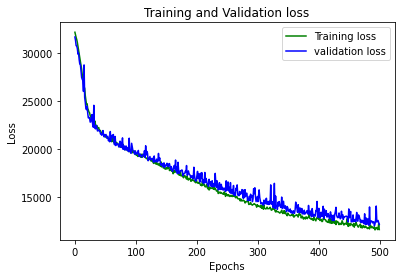

In [13]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,500)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
# Load wights file of the best model :
dl_model.load_weights(checkpoint_name) # load it
dl_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
result = dl_model.evaluate(X_test, y_test)
print("Loss Value:", result[0])
print("MAE Value:", result[1])

36/36 [==============================] - 0s 722us/step - loss: 11382.2939 - mean_absolute_error: 11382.2939
Loss Value: 11382.2939453125
MAE Value: 11382.2939453125


## Random Forest Model

In [15]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)
rf_history = rf.fit(X_train,y_train)
np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-5422.072183801044

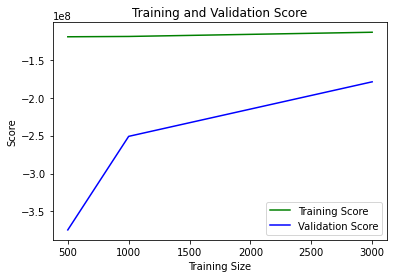

In [16]:
# plot the curve
plot_curve(rf, X_train, y_train, [500, 1000, 3000], cv=5)

In [ ]:
# tune models GridsearchCV 
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[100, 200, 300, 1000], 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

In [18]:
tpred_rf = rf.predict(X_test)
print("Random Forest MAE: ", mean_absolute_error(y_test,tpred_rf))
print(tpred_rf[15], y_test.iloc[[15]])

Random Forest MAE:  4477.674123537869
[113411.68985318 133941.12656878]        Minimum   Maximum
1227  100000.0  125000.0


## XGBoost

In [23]:
from xgboost import XGBRegressor

xgb_max_model = XGBRegressor(n_estimators=100, learning_rate=0.05)
xgb_min_model = XGBRegressor(n_estimators=100, learning_rate=0.05)
xgb_min_model.fit(X_train, y_train['Minimum'], 
             early_stopping_rounds=5, 
             eval_set=[(X_test, y_test['Minimum'])], 
             verbose=False)
xgb_max_model.fit(X_train, y_train['Maximum'], 
             early_stopping_rounds=5, 
             eval_set=[(X_test, y_test['Maximum'])], 
             verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

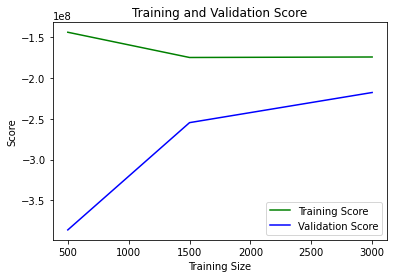

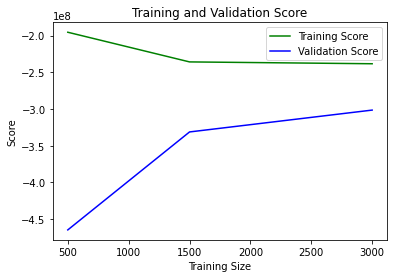

In [24]:
plot_curve(xgb_min_model, X_train, y_train['Minimum'])
plot_curve(xgb_max_model, X_train, y_train['Maximum'])

In [25]:
xgb_min_predict = xgb_min_model.predict(X_test)
xgb_max_predict = xgb_max_model.predict(X_test)

print("MAE minimum:", mean_absolute_error(y_test['Minimum'], xgb_min_predict))
print("MAE maximum:", mean_absolute_error(y_test['Maximum'], xgb_max_predict))
print(xgb_min_predict[17], xgb_max_predict[17], y_test.iloc[[17]])

MAE minimum: 8291.84200201346
MAE maximum: 9850.14028022948
91043.09 192551.3        Minimum   Maximum
2878  109000.0  194000.0


In [29]:
# Pick the best model which in this case is random forest
# dump the data to the pickle
import pickle
pickl = {'model': rf}
pickle.dump( pickl, open( 'salary_model' + ".pkl", "wb" ) )

# test model
file_name = "salary_model.pkl"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

model.predict(np.array(list(X_test.iloc[3,:])).reshape(1,-1))[0]


array([ 97000., 189000.])